# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data/human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [61]:
# Summary Statistics
mean = df.temperature.mean()
mean


98.24923076923078

In [62]:
stddev = df.temperature.std()
stddev

0.7331831580389454

In [63]:
s = np.std(df['temperature'])
s

0.7303577789050377

In [64]:
median = df.temperature.median()
median

98.3

In [8]:
sample_size  =  len(df.temperature)
sample_size

130

In [9]:
# function for plotting CDF

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
  
    y = np.arange(1,n+1) / n
    return x, y

# 1.) Is the distribution of body temperatures normal?

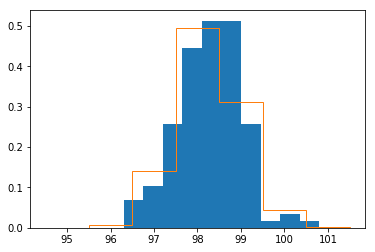

In [10]:
plt.hist(df.temperature,density = True)

ref_std_normal_dist = np.random.normal(mean , stddev , size = 10000)

#plt.hist(ref_std_normal_dist, density = True,bins=100, histtype = 'step') 

bins = np.arange(95, max(ref_std_normal_dist) + 1.5) - 0.5
plt.hist(ref_std_normal_dist, density = True,bins=bins, histtype = 'step') 

plt.show()

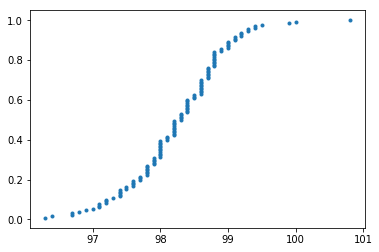

In [11]:
x, y = ecdf(df.temperature)
plt.plot(x, y,marker = '.',linestyle = 'none')
plt.show()

 Ans : From the pdf and cdf plotted above , it looks like the body temperature follows a ' normal distribution'

# 2)Is the sample size large? Are the observations independent?

The sample size is 130, which is a fairly large enough sample size, although it is preferred to have close to 1000 samples.
The observations are independent

# 3) Is the true population mean really 98.6 degrees F?
First, try a bootstrap hypothesis test.
Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
In this situation, is it appropriate to use the  tt  or  zz  statistic?
Now try using the other test. How is the result be different? Why?

In [35]:
# Proposing  the Null hypothesis that the true population mean of temp is equal to the conventional mean which is   98.6 deg F. 
# In this situation, it is appropriate to use the t- statistic as the sample standard deviation is not known.


conv_mean = 98.6
temp_shift = df['temperature'] - mean + conv_mean


# Define test statistic function
def t_stat(data, conv_mean=98.6):
   # Calculate t-stat
    return (np.mean(data) - conv_mean) / (np.std(data) / np.sqrt(len(data)))


#  t-stat for data
t_obs = t_stat(df['temperature'], conv_mean)



#  bootstrap replicate
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    # Draw a number of bootstrap replicates.
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates


# Check the null hypothesis by bootstrapping the shifted data
bs_t_reps = draw_bs_reps(temp_shifted, t_stat, size=10000)


# Compute the p-value
p_t_value = np.sum(np.abs(bs_t_reps) >= np.abs(t_obs)) / len(bs_t_reps)


print('t-statistic :', t_obs)
print('p-value     :', p_t_value)

t-statistic : -5.475925202078116
p-value     : 0.0


t-statistic is -5.476.
And  p-value of '0' indicates that in 10,000 trials, not even a  single trial produced a sample mean as extreme as the observed sample mean.So the null hypothesis that the true population mean is 98.6 F can rejected.

In [26]:
# Trying out the z-statistic as well

def z_stat(data, conv_mean=98.6, stddev=0.7331831580389454):
    return (np.mean(data) - conv_mean) / (s / np.sqrt(len(data)))


# Compute test statistic for data
z_obs = z_stat(df['temperature'], conv_mean) 


# Simulate data acquisition under the null hypothesis by bootstrapping the shifted data
bs_z_reps = draw_bs_reps(temp_shift, z_stat, size=10000)


# Compute p-value
p_z_value = np.sum(np.abs(bs_z_reps) >= np.abs(z_obs)) / len(bs_z_reps)


print('z-stats:', z_obs)
print('p-value:', (p_z_value))

z-stats: -5.475925202078116
p-value: 0.0


It can be seen that the z-stat and  t-stat are the same. This behaviour is as expected as when the large sample size gets bigger  t-statistic approaches  z-statistic.

# 4) Draw a small sample of size 10 from the data and repeat both frequentist tests.
Which one is the correct one to use?
What do you notice?
What does this tell you about the difference in application of the  tt  and  zz  statistic?

In [46]:
# Draw a sample size of 10
sample = np.random.choice(df['temperature'], size=10)

# shift in  sample

shift_sample = sample - np.mean(sample) + conv_mean 
print(shift_sample)

# t-stat
t_obs_sample = t_stat(sample)

#  bootstrap reps
bs_t_reps_sample = draw_bs_reps(shift_sample, t_stat, size=10000)

# p-value
p_t_value_sample = np.sum(np.abs(bs_t_reps_sample) >= np.abs(t_obs_sample)) / len(bs_t_reps_sample)

print('t-statistic for n=10:', t_obs_sample)
print('p-value: ', p_t_value_sample)
print('')


# Compute z-statistic
z_obs_sample = z_stat(sample)
# Draw bootstrap reps
bs_z_reps_sample = draw_bs_reps(shift_sample, z_stat, size=10000)
# Compute the p-value
p_z_value_sample = np.sum(np.abs(bs_z_reps_sample) >= np.abs(z_obs_sample)) / len(bs_z_reps_sample)

print('z-statistic for n=10:', z_obs_sample)
print('p-value:',p_z_value_sample)



[97.59 99.39 98.79 98.79 98.19 98.99 98.99 99.09 99.89 96.29]
t-statistic for n=10: 0.03256620723125386
p-value:  0.9774

z-statistic for n=10: 0.04329765152780919
p-value: 0.9874


No significant observation can be drawn from this( though I would have expected  the t-stat to be significant as the sample size is less than 10), from my results I cannot draw any inference!!!

# 5 ) At what temperature should we consider someone's temperature to be "abnormal"?
As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [79]:
# Z- Score at 95% confidence interval is  1.96
Z_score = 1.96
#Standard Error  = standard deviation/ Sq.rt of n(sample size)
std_err = s/np.sqrt(sample_size)

#Margin of Error

margin_error =  1.96* s/np.sqrt(sample_size)
print('Margin Error',margin_error)

# Confidence Interval @ 95%

confidence_int = np.percentile(df['temperature'], [2.5, 97.5])
print('Confidence Interval  @ 95%',confidence_int)

# Abnormal Temperature Range = +/- Z_score*std_err

Temp_range = 1.96 * std_err
print("Abnormal Temperature Range is out side the range ", mean+Temp_range,'and',mean-Temp_range)


Margin Error 0.125550964802579
Confidence Interval  @ 95% [96.7225 99.4775]
Abnormal Temperature Range is out side the range  98.37478173403336 and 98.12367980442819


# 6) Is there a significant difference between males and females in normal temperature?
What testing approach did you use and why?
Write a story with your conclusion in the context of the original problem.

In [74]:
male = df[df.gender == 'M']
female = df[df.gender == 'F']

# Lets start with the NULL hypothesis that the distributions of temperatures for males and females are identical.

# define function to calculate  'difference of means.

def diff_of_means(data_1, data_2):
    return np.mean(data_1) - np.mean(data_2)

# Observed data
diff_obs = diff_of_means(female.temperature,male.temperature)

# permutation replicates
perm_reps = np.empty(10000)
for i in range(len(perm_reps)):
    common = np.concatenate((male.temperature, female.temperature))
    common_perm = np.random.permutation(common)
    perm_rep_fem = common_perm[: len(female)]
    perm_rep_male = common_perm[len(female):]
    perm_reps[i] = diff_of_means(perm_rep_fem,perm_rep_male)  
    
# Compute p-value
p_value = np.sum(abs(perm_reps) >= abs(diff_obs)) / len(perm_reps)

print('observed difference:',diff_obs, 'deg. F' )
print('p-value:',p_value)

observed difference: 0.289230769230727 deg. F
p-value: 0.0272


Since the p value is less than 0.05, the hypothesis that  distributions of temperatures for males and females are identical is rejected. There is a significant difference between the distribution of male and female temperatures.

It also can be concluded as per this analysis  the mean human temperature is not 98.6 F. This value is not statistically accurate. Statistically, he mean human body temperature to be 98.2 +/- 0.13$^{\circ}$F (to a 95% confidence interval). Additionally, we discovered a statistically significant difference between male and female temperatures of approximately 0.29$^{\circ}$F. Females tend to have warmer body temperatures and males tend to have cooler body temperatures.